# Task 4

In [1]:
import pathlib
import matplotlib.pyplot as plt
import utils
from torch import nn
import torchvision
#from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from dataloadersResNet import load_cifar10

In [2]:
def create_plots(trainer: Trainer, name: str):
    plot_path = pathlib.Path("plots")
    plot_path.mkdir(exist_ok=True)
    # Save plots and show them
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.grid()
    plt.title("Cross Entropy Loss")
    utils.plot_loss(trainer.train_history["loss"], label="Training loss", npoints_to_average=10)
    utils.plot_loss(trainer.validation_history["loss"], label="Validation loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.grid()
    utils.plot_loss(trainer.validation_history["accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.savefig(plot_path.joinpath(f"{name}_plot.png"))
    plt.show()

In [3]:
class ResNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(512, 10) # No need to apply softmax,
        # as this is done in nn.CrossEntropyLoss
        for param in self.model.parameters(): # Freeze all parameters
            param.requires_grad = False
        for param in self.model.fc.parameters(): # Unfreeze the last fully-connected
            param.requires_grad = True # layer
        for param in self.model.layer4.parameters(): # Unfreeze the last 5 convolutional
            param.requires_grad = True # layers
        self.batch_size = 32

    def forward(self, x):
        x = self.model(x)
        return x

In [4]:
utils.set_seed(0)
epochs = 8
batch_size = 32
learning_rate = 3e-4
early_stop_count = 5
dataloaders = load_cifar10(batch_size)
model = ResNetModel()#image_channels=3, num_classes=10)
optimizer = "adam"
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders,
    optimizer
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNetModel(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

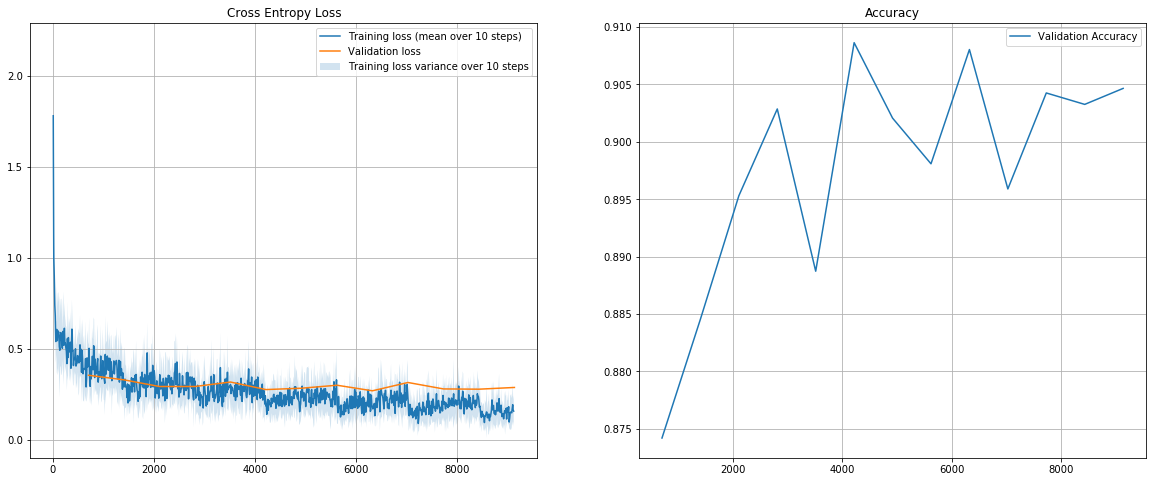

In [5]:
create_plots(trainer, "task4")

In [6]:
training_loss, training_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
validation_loss, validation_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
test_loss, test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)
print(f"  Training: Accuracy: {training_accuracy}, Loss: {training_loss}")
print(f"Validation: Accuracy: {validation_accuracy}, Loss: {validation_loss}")
print(f"      Test: Accuracy: {test_accuracy}, Loss: {test_loss}")

  Training: Accuracy: 0.9575480222702026, Loss: 0.13397274911403656
Validation: Accuracy: 0.9008758068084717, Loss: 0.30497217178344727
      Test: Accuracy: 0.8874800205230713, Loss: 0.34789249300956726
